<a href="https://colab.research.google.com/github/Aitor1411/AR-PCB/blob/main/src/05_DIY_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os

project_path = 'PHM_tutorial'

if not os.path.isdir(project_path):

  username = 'klopetx'
  repo = project_path

  !git clone https://@github.com/{username}/{repo}

os.chdir(project_path)

indicator_file_path = "data/indicators.csv"

if not os.path.isfile(indicator_file_path):
  print('Indicator dataset not found, extracting indicators...')
  !python src/00_Environment_Checks.py
  !python src/01_Indicator_extraction.py
  print('Indicators extracted succesfully!')

Cloning into 'PHM_tutorial'...
remote: Enumerating objects: 203, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 203 (delta 40), reused 0 (delta 0), pack-reused 128 (from 1)
Receiving objects: 100% (203/203), 4.42 MiB | 10.65 MiB/s, done.
Resolving deltas: 100% (106/106), done.


# Now Is Your Time...

With everything we've covered in these two sessions, it's now your time to demonstrate what you've learned.

What I need you to do is build a model, from feature extraction (which I've already completed for you) to model validation.

You can either complete the Remaining Useful Life (RUL) exercise that we did in our last session, or you could create a new exercise by manipulating the indicators. This could be to create an anomaly detection, a clustering problem, or a diagnostic model.

**The choice is yours**


# Evaluation

The following list of checkmarks will be used to evaluate the work, note some are optinoal while others are **compulsory**.

The following checks are a must:

- [ ] From a fresh restart, the notebook compiles correclty
- [ ] Use a validation partitioning schema
- [ ] Train a model
- [ ] Validate the model

The following checks will improve your marks and your understanding:

- [ ] Built a new problem dataset (anomaly, diagnosis, clustering)
- [ ] Checked the existence of missing values in the dataset / Eliminated outliers
- [ ] New exploratory visualization has been created
- [ ] Improved validation schemas have been used
- [ ] Feature engineering techniques are used
- [ ] New modelling algorithms are employed
- [ ] Deployment: A function that, given a file path reads, extracts indicators, runs model and returns a label.

Good luck and don't hesitate to ask any questions you might have during the development.

**From a fresh restart, the notebook compiles correclty**

In [3]:
import pandas as pd
indicators = pd.read_csv('data/indicators.csv', sep = '\t')
indicators.head()

,Origin,Bearing,OperatingCondition,TestNumber,TestIdx,Hour,Minute,Second,Mili/centisecond,Mean,...,BPFO_rms,BPFI_max,BPFI_rms,BSF_max,BSF_rms,Timestamp,Duration,Actual_RUL,RUL,Alive
0,Full_Test_Set,Bearing2_4,2,4,1,8,3,36,462540.0,0.006552,...,3.462482,2.702957,2.455653,15.180564,13.488451,2000-01-01 08:03:36,0.0,1390,1390.0,True
1,Full_Test_Set,Bearing2_4,2,4,2,8,3,46,462540.0,0.001299,...,5.925823,5.629765,4.592479,18.305801,13.007734,2000-01-01 08:03:46,10.0,1390,1380.0,True
2,Full_Test_Set,Bearing2_4,2,4,3,8,3,56,462540.0,0.003271,...,3.938765,6.103561,4.583218,9.434037,8.430699,2000-01-01 08:03:56,20.0,1390,1370.0,True
3,Full_Test_Set,Bearing2_4,2,4,4,8,4,6,462540.0,0.003263,...,2.652722,6.837217,6.077246,13.578691,10.908141,2000-01-01 08:04:06,30.0,1390,1360.0,True
4,Full_Test_Set,Bearing2_4,2,4,5,8,4,16,462540.0,0.004246,...,3.710252,8.133538,6.903766,12.933754,9.514291,2000-01-01 08:04:16,40.0,1390,1350.0,True


**Use a validation partitioning schema**

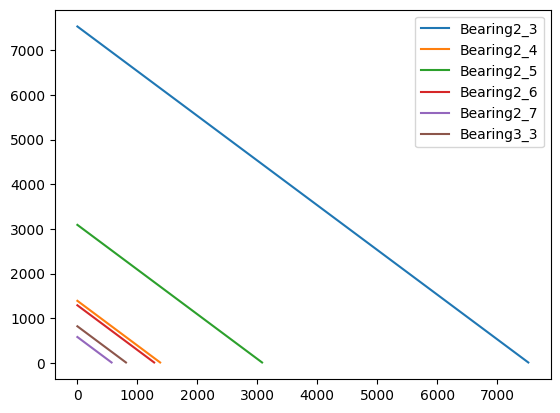

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

indicators = indicators[indicators.Alive == True].copy()

groups = indicators.groupby('Bearing')

for name, group in groups:
    plt.plot(group['Duration'],group['RUL'], label=name)

plt.legend()
plt.show()

In [5]:
indicators.columns


Index(['Origin', 'Bearing', 'OperatingCondition', 'TestNumber', 'TestIdx',
       'Hour', 'Minute', 'Second', 'Mili/centisecond', 'Mean',
       'Standard Deviation', 'RMS', 'Peak', 'Peak-to-Peak', 'Skewness',
       'Kurtosis', 'Crest Factor', 'Form Factor', 'Impulse Factor',
       'Margin Factor', 'Total Energy', 'Max Power Frequency',
       'Spectral Centroid', 'Spectral Bandwidth', 'Spectral Flatness',
       'Spectral Roll-off', 'BPFO_max', 'BPFO_rms', 'BPFI_max', 'BPFI_rms',
       'BSF_max', 'BSF_rms', 'Timestamp', 'Duration', 'Actual_RUL', 'RUL',
       'Alive'],
      dtype='object')

In [6]:
import numpy as np

from sklearn.model_selection import train_test_split

actual_indicators = ['Mean',
       'Standard Deviation', 'RMS', 'Peak', 'Peak-to-Peak', 'Skewness',
       'Kurtosis', 'Crest Factor', 'Form Factor', 'Impulse Factor',
       'Margin Factor', 'Total Energy', 'Max Power Frequency',
       'Spectral Centroid', 'Spectral Bandwidth', 'Spectral Flatness',
       'Spectral Roll-off', 'BPFO_max', 'BPFO_rms', 'BPFI_max', 'BPFI_rms',
       'BSF_max', 'BSF_rms']

target_variable = ['RUL']

In [7]:
# prompt: Select the variables to be used in the partitioning

X = indicators[actual_indicators]
X.head()


,Mean,Standard Deviation,RMS,Peak,Peak-to-Peak,Skewness,Kurtosis,Crest Factor,Form Factor,Impulse Factor,...,Spectral Centroid,Spectral Bandwidth,Spectral Flatness,Spectral Roll-off,BPFO_max,BPFO_rms,BPFI_max,BPFI_rms,BSF_max,BSF_rms
0,0.006552,0.341202,0.341264,1.142,2.272,0.051280,0.033186,3.346378,1.260168,4.217001,...,3264.183946,1913.956710,-7.961653,4520.0,4.478474,3.462482,2.702957,2.455653,15.180564,13.488451
1,0.001299,0.318229,0.318232,1.098,2.178,0.075415,0.015628,3.450318,1.250507,4.314646,...,3435.415092,2069.869338,-7.217908,5160.0,6.817578,5.925823,5.629765,4.592479,18.305801,13.007734
2,0.003271,0.326795,0.326811,1.247,2.333,0.062380,0.208370,3.815656,1.266538,4.832675,...,3187.168391,2064.430632,-7.633558,4790.0,4.653304,3.938765,6.103561,4.583218,9.434037,8.430699
3,0.003263,0.347232,0.347247,1.147,2.179,0.002695,-0.177687,3.303124,1.237778,4.088534,...,3586.623873,2018.803340,-7.532386,5260.0,3.219246,2.652722,6.837217,6.077246,13.578691,10.908141
4,0.004246,0.351220,0.351245,1.572,2.860,-0.021161,0.318689,4.475503,1.268576,5.677516,...,3380.191128,1928.736549,-8.284707,4760.0,3.806821,3.710252,8.133538,6.903766,12.933754,9.514291


In [8]:
# Select the indicators for the training, select target variable
Y = indicators[target_variable]
Y.head()

,RUL
0,1390.0
1,1380.0
2,1370.0
3,1360.0
4,1350.0


In [9]:
# Create a train test partitioning
X_train, X_test, y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
# prompt: # Import the model
# # Fit the model
# # check the score

from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Check the score of the model on the test data
score = model.score(X_test, Y_test)
print(f"Model R^2 score on the test set: {score}")

Model R^2 score on the test set: 0.39298600597997146


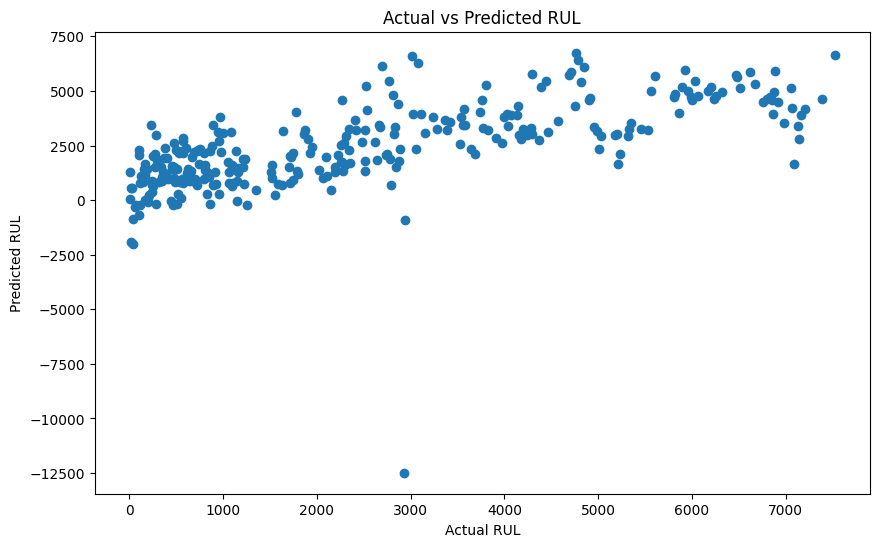

In [11]:
# prompt: plotear el verdadero contra predicho

import matplotlib.pyplot as plt

# Assuming 'model' and 'X_test', 'Y_test' are defined from the previous code
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Actual vs Predicted RUL")
#plt.plot([min(Y_test.min(),y_pred.min()), max(Y_test.max(),y_pred.max())], [min(Y_test.min(),y_pred.min()), max(Y_test.max(),y_pred.max())], color='red') # Add a diagonal line
plt.show()

Checked the existence of missing values in the dataset

In [12]:
# prompt: Checked the existence of missing values in the dataset

# Check for missing values in the dataset
missing_values = indicators.isnull().sum()
missing_values

# If there are missing values, you can choose to handle them:
# 1. Remove rows with missing values:
# indicators = indicators.dropna()

# 2. Impute missing values (e.g., with the mean or median):
# for column in indicators.columns:
#     if indicators[column].isnull().any():
#         indicators[column] = indicators[column].fillna(indicators[column].mean()) # or .median()


,0
Origin,0
Bearing,0
OperatingCondition,0
TestNumber,0
TestIdx,0
Hour,0
Minute,0
Second,0
Mili/centisecond,0
Mean,0
